<a href="https://colab.research.google.com/github/eg204212/Computer-Vision-and-Image-Processing--Take-Home-Assignment-1/blob/main/EC7212_Take_Home_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# STEP 1: Reducing Number of Intensity Levels

Enter number of intensity levels (power of 2): 8


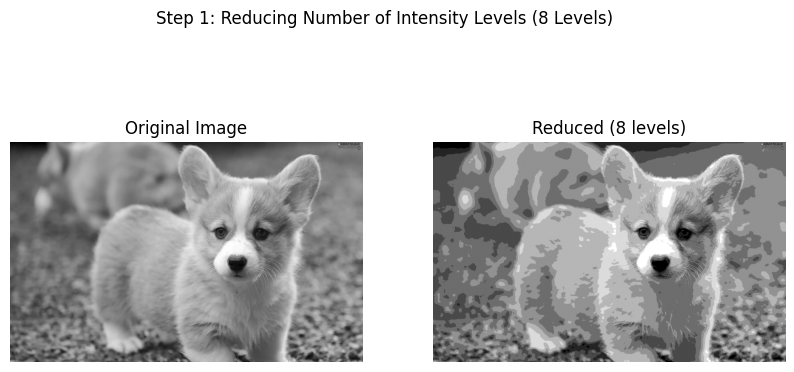

In [30]:
img = cv2.imread('puppy_image.png', cv2.IMREAD_GRAYSCALE)

n_levels = int(input("Enter number of intensity levels (power of 2): "))
quant_step = 256 // n_levels
img_reduced = (img // quant_step) * quant_step
cv2.imwrite(f'reduced_{n_levels}.png', img_reduced)

# DISPLAY STEP 1 Results
plt.figure(figsize=(10, 5))
plt.suptitle(f"Step 1: Reducing Number of Intensity Levels ({n_levels} Levels)")

# Original Image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis('off')

# Reduced Image
plt.subplot(1, 2, 2)
plt.title(f"Reduced ({n_levels} levels)")
plt.imshow(img_reduced, cmap='gray')
plt.axis('off')

plt.show()

# STEP 2: Spatial Averaging (3x3, 10x10, 20x20)

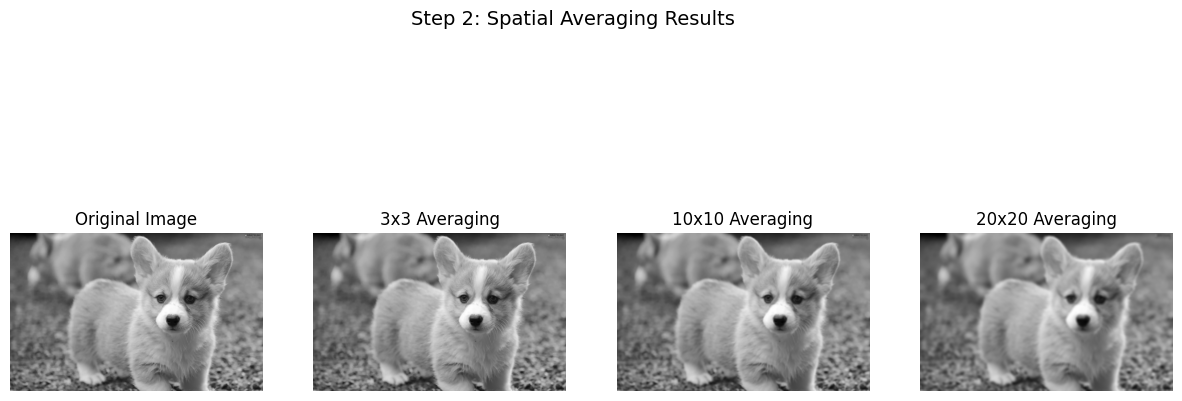

In [34]:
img_3x3 = cv2.blur(img, (3, 3))
img_10x10 = cv2.blur(img, (10, 10))
img_20x20 = cv2.blur(img, (20, 20))

cv2.imwrite('averaged_3x3.png', img_3x3)
cv2.imwrite('averaged_10x10.png', img_10x10)
cv2.imwrite('averaged_20x20.png', img_20x20)

# DISPLAY STEP 2 Results
plt.figure(figsize=(15, 5))
plt.suptitle("Step 2: Spatial Averaging Results", fontsize=14, y=1.1)

# Original Image
plt.subplot(1, 4, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis('off')

# Averaged 3x3
plt.subplot(1, 4, 2)
plt.title("3x3 Averaging")
plt.imshow(img_3x3, cmap='gray')
plt.axis('off')

# Averaged 10x10
plt.subplot(1, 4, 3)
plt.title("10x10 Averaging")
plt.imshow(img_10x10, cmap='gray')
plt.axis('off')

# Averaged 20x20
plt.subplot(1, 4, 4)
plt.title("20x20 Averaging")
plt.imshow(img_20x20, cmap='gray')
plt.axis('off')

plt.show()

# STEP 3: Rotation by 45° and 90°

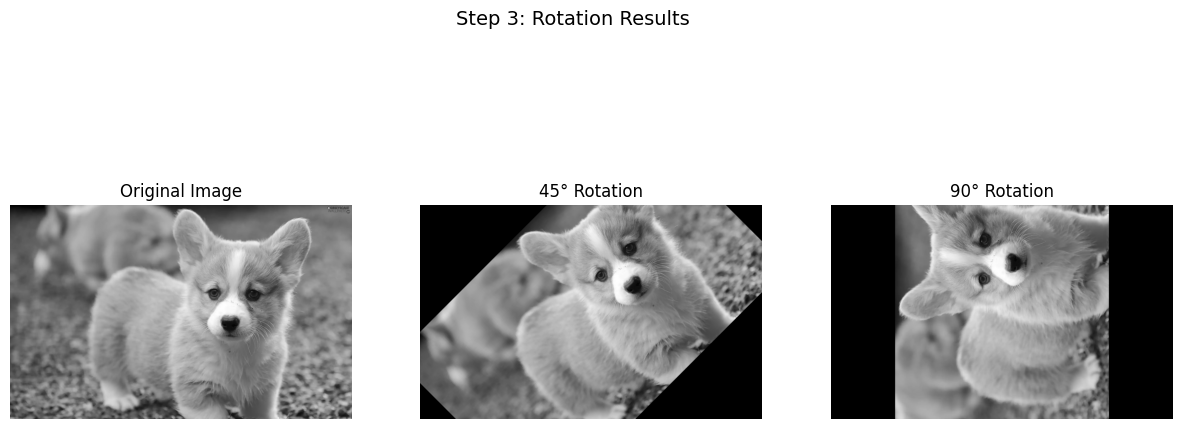

In [31]:
(h, w) = img.shape[:2]
center = (w//2, h//2)

rot_45 = cv2.getRotationMatrix2D(center, 45, 1.0)
rot_90 = cv2.getRotationMatrix2D(center, 90, 1.0)

img_rot_45 = cv2.warpAffine(img, rot_45, (w, h))
img_rot_90 = cv2.warpAffine(img, rot_90, (w, h))

cv2.imwrite('rotated_45.png', img_rot_45)
cv2.imwrite('rotated_90.png', img_rot_90)

# DISPLAY STEP 3 Results
plt.figure(figsize=(15, 5))
plt.suptitle("Step 3: Rotation Results", fontsize=14, y=1.1)

# Original Image
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis('off')

# Rotated 45°
plt.subplot(1, 3, 2)
plt.title("45° Rotation")
plt.imshow(img_rot_45, cmap='gray')
plt.axis('off')

# Rotated 90°
plt.subplot(1, 3, 3)
plt.title("90° Rotation")
plt.imshow(img_rot_90, cmap='gray')
plt.axis('off')

plt.show()

# STEP 4: Block Averaging

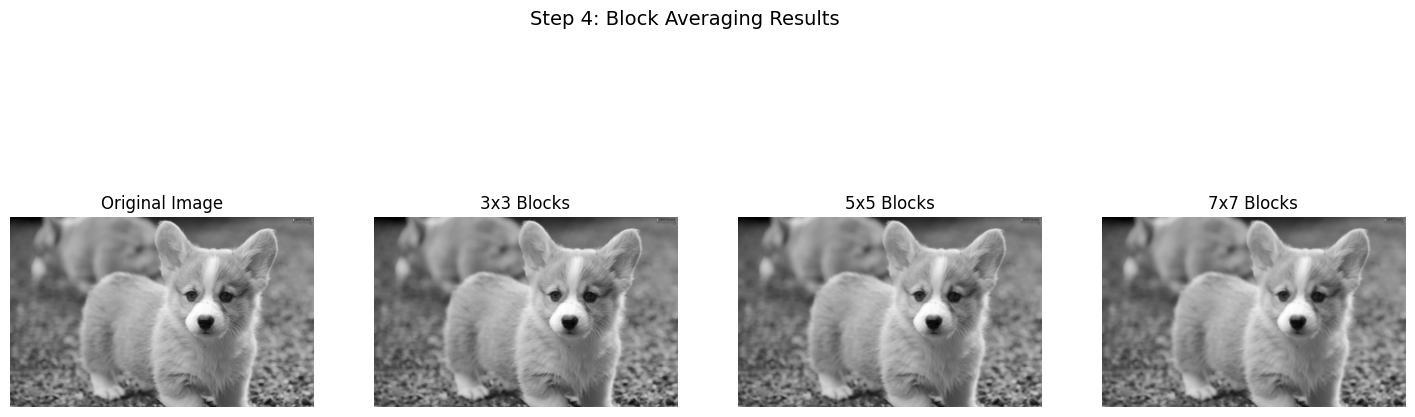

In [32]:
def block_average(img, block_size):
    h, w = img.shape
    result = img.copy()
    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            block = img[i:i+block_size, j:j+block_size]
            average_value = np.mean(block, dtype=np.float32)
            result[i:i+block_size, j:j+block_size] = average_value
    return result

img_3 = block_average(img, 3)
img_5 = block_average(img, 5)
img_7 = block_average(img, 7)

cv2.imwrite('block_avg_3.png', img_3)
cv2.imwrite('block_avg_5.png', img_5)
cv2.imwrite('block_avg_7.png', img_7)

# DISPLAY STEP 4 Results
plt.figure(figsize=(18, 5))
plt.suptitle("Step 4: Block Averaging Results", fontsize=14, y=1.1)

# Original
plt.subplot(1, 4, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis('off')

# 3x3 Block Averaging
plt.subplot(1, 4, 2)
plt.title("3x3 Blocks")
plt.imshow(img_3, cmap='gray')
plt.axis('off')

# 5x5 Block Averaging
plt.subplot(1, 4, 3)
plt.title("5x5 Blocks")
plt.imshow(img_5, cmap='gray')
plt.axis('off')

# 7x7 Block Averaging
plt.subplot(1, 4, 4)
plt.title("7x7 Blocks")
plt.imshow(img_7, cmap='gray')
plt.axis('off')

plt.show()